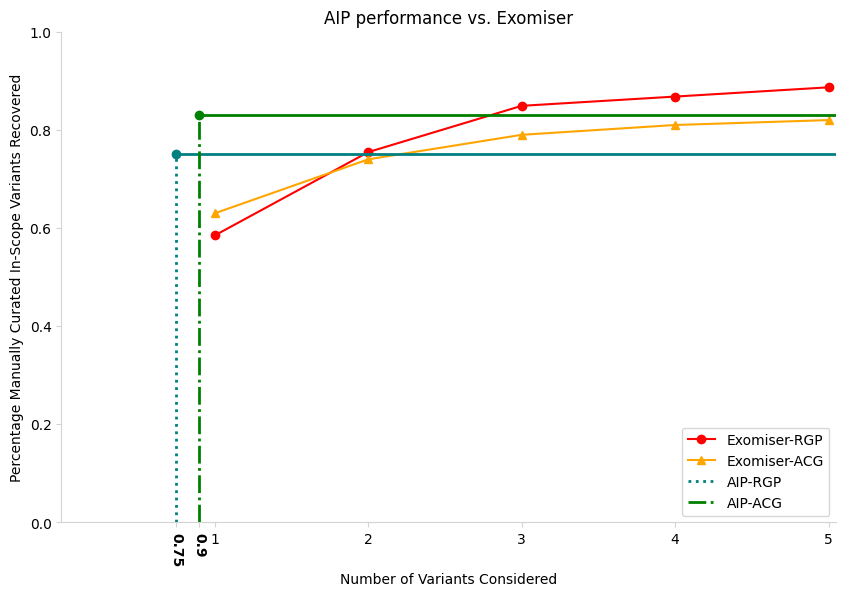

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd
import cv2
from matplotlib.colors import LinearSegmentedColormap

#RGP data is preliminary/small set data!!!
rgp_data = (np.array([1, 2, 3, 4, 5]),
        np.array([31/53, 40/53, 45/53, 46/53, 47/53]),
       )

#ACG data is mock data!!!
acg_data = (np.array([1, 2, 3, 4, 5]),
        np.array([63/100, 74/100, 79/100, 81/100, 82/100]),
       )


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax1 = plt.subplot2grid(shape=(10, 8), loc=(0, 0), colspan=8, rowspan=8)

ax1.set_ylim(bottom=0, top=1)
ax1.set_xlim(left=0, right= 5.05)
ax1.set_xticks(rgp_data[0])
ax1.set_ylabel("Percentage Manually Curated In-Scope Variants Recovered")
ax1.set_xlabel("Number of Variants Considered")

ax1.plot(rgp_data[0], rgp_data[1], '-o', color = 'red', label="Exomiser-RGP")
ax1.set_title('AIP performance vs. Exomiser')

ax1.plot(acg_data[0], acg_data[1], '-^', color = 'orange', label="Exomiser-ACG")
ax1.set_title('AIP performance vs. Exomiser')

ax1.vlines(x=0.75, ymin=0, ymax=0.75, colors='teal', ls=':', lw=2, label='AIP-RGP')
ax1.hlines(y=0.75, xmin=0.75, xmax=10, colors='teal', ls='-', lw=2)
ax1.plot(0.75, 0.75, "teal", marker='.', ls='none', ms=12)

ax1.vlines(x=0.9, ymin=0, ymax=0.83, colors='green', ls='-.', lw=2, label='AIP-ACG')
ax1.hlines(y=0.83, xmin=0.9, xmax=10, colors='green', ls='-', lw=2)
ax1.plot(0.9, 0.83, "green", marker='.', ls='none', ms=12)

extraticks=[0.9,0.75]
xt = ax1.get_xticks() 
xt = np.append(xt,extraticks)

ax1.set_xticks([0.75,0.9,1,2,3,4,5])
ax1.set_xticklabels([0.75,0.9,1,2,3,4,5])
ticks = ax1.get_xticklabels()
ticks[0].set_rotation(270)
ticks[1].set_rotation(270)
ticks[0].set_fontweight("bold")
ticks[1].set_fontweight("bold")
ax1.legend(loc="lower right")

axes = [ax1]
for axis in axes:
    axis.spines['top'].set_visible(False) 
    axis.spines['right'].set_visible(False)
    axis.spines['bottom'].set_color('lightgrey')
    axis.spines['left'].set_color('lightgrey')
    axis.tick_params(axis='x', color='lightgrey')
    axis.tick_params(axis='y', color='lightgrey')

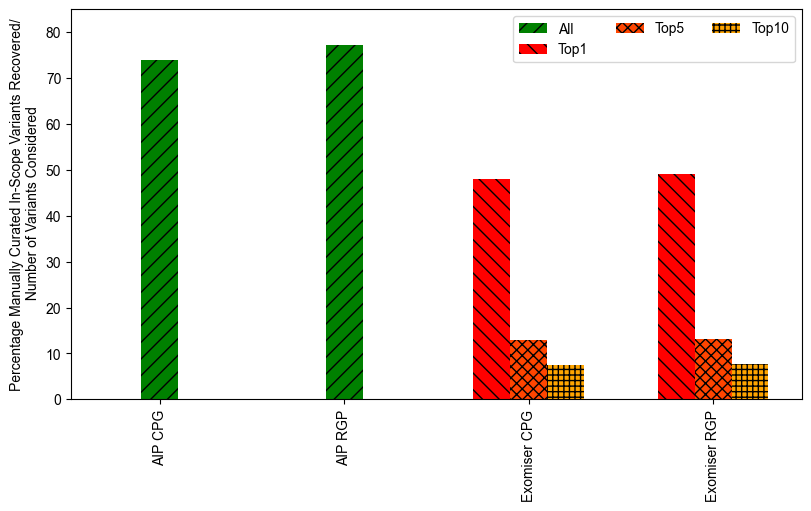

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = [8,5]

tool = ("AIP CPG", "AIP RGP", "Exomiser CPG", "Exomiser RGP")
values = {
    'All': ((81/1.0944), (71/0.92), 0, 0),
    'Top1': (0, 0, (48/1), (49/1)),
    'Top5': (0, 0, (65/5), (66/5)),
    'Top10': (0, 0, (75/10), (76/10)),
}

x = np.arange(len(tool))  # the label locations
width = 0.5  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    # print(attribute, measurement)
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute)
    if multiplier==0:
        rects = ax.bar(x, measurement, width=0.2, label=attribute, color = "green", hatch='//')
    if multiplier==1:
        rects = ax.bar((x + offset - 0.7), measurement, width=0.2, label=attribute, color="red", hatch='\\\\')
    if multiplier==2:
        rects = ax.bar((x + offset - 1), measurement, width=0.2, label=attribute, color="orangered", hatch='xxx')
    if multiplier==3:
        rects = ax.bar((x + offset - 1.3), measurement, width=0.2, label=attribute, color="orange", hatch='+++')
    # ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage Manually Curated In-Scope Variants Recovered/\n Number of Variants Considered')
#ax.set_title('Diagnostic yield per average variant by Cohort and Method')
ax.set_xticks(x, tool)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 85)
plt.xticks(rotation=90)
plt.show()